**Importing necessary libraries:**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load the dataset from the IMDb Movies India.csv file.**

In [2]:
df = pd.read_csv("/kaggle/input/imdb-india-movies/IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

**Data types and summary statistics**

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None
            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


**Handling missing values**

In [5]:
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


**Data Visualization:**

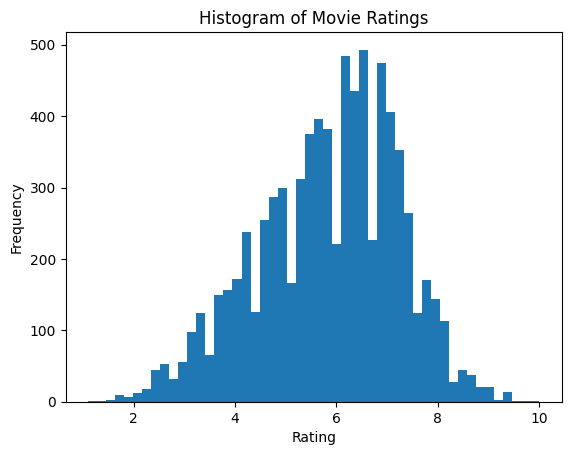

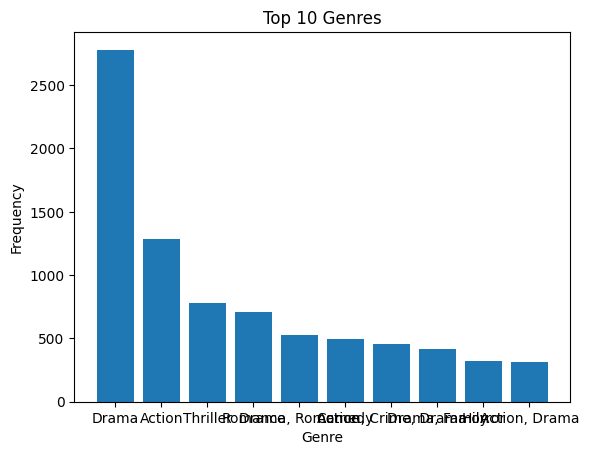

In [6]:
# Histogram of movie ratings
plt.hist(df['Rating'], bins=50)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Ratings')
plt.show()

# Bar chart of top 10 genres
genre_counts = df['Genre'].value_counts().head(10)
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Top 10 Genres')
plt.show()

In [7]:
# Calculate the average rating for each genre
genre_ratings = df.groupby('Genre')['Rating'].mean()
print(genre_ratings)

Genre
Action                          5.092566
Action, Adventure               5.558333
Action, Adventure, Biography    7.800000
Action, Adventure, Comedy       5.610000
Action, Adventure, Crime        5.556250
                                  ...   
Thriller, Action                4.300000
Thriller, Musical, Mystery      7.100000
Thriller, Mystery               6.533333
Thriller, Mystery, Family       6.100000
War                             4.333333
Name: Rating, Length: 485, dtype: float64


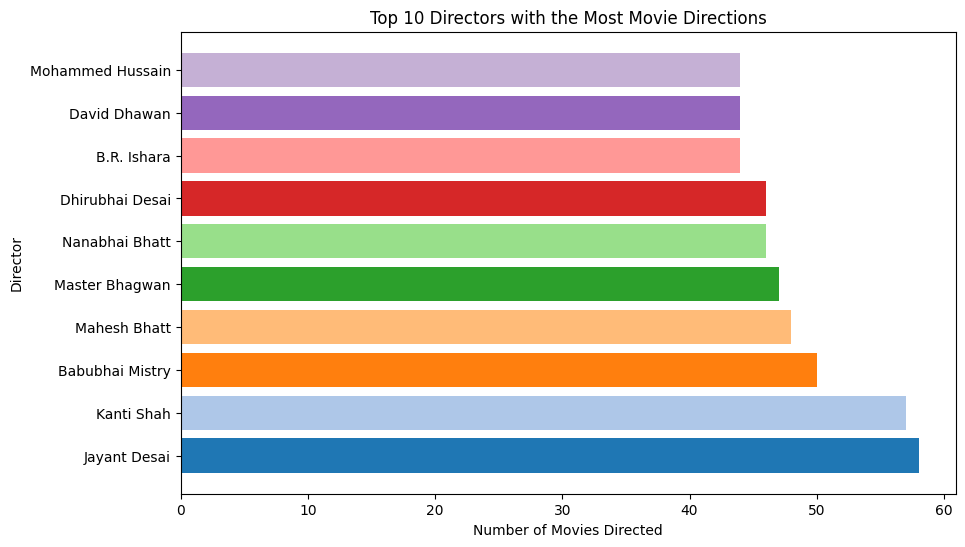

In [8]:
director_counts = df['Director'].value_counts()

top_directors = director_counts.nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_directors.index, top_directors.values, color=plt.cm.tab20(range(len(top_directors))))
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.title('Top 10 Directors with the Most Movie Directions')
plt.show()

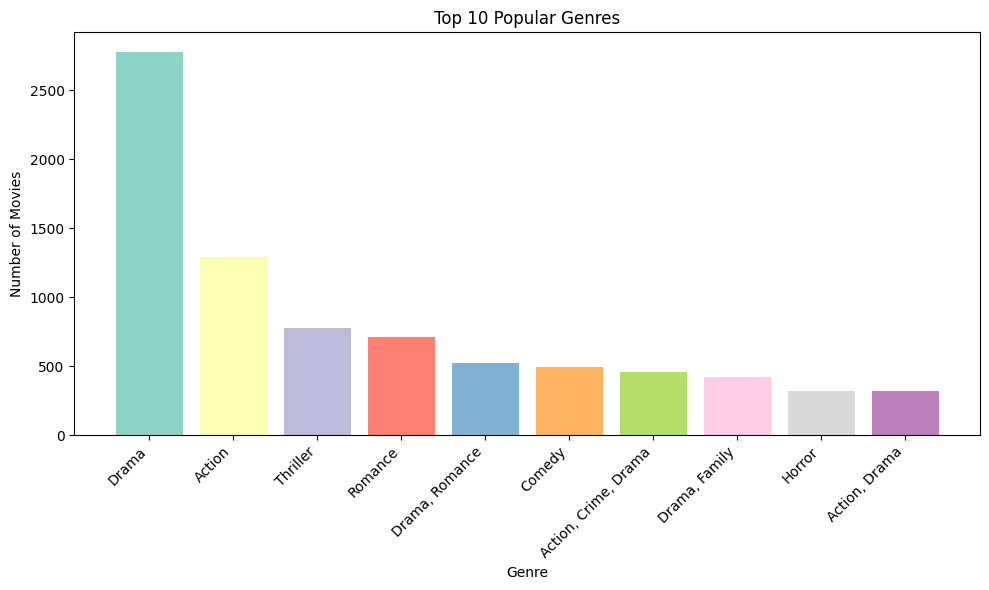

In [9]:
genre_counts = df['Genre'].value_counts()

top_genres = genre_counts.nlargest(10)

# Create a bar plot with pretty colors and shape
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values, color=plt.cm.Set3(range(len(top_genres))))
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Popular Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


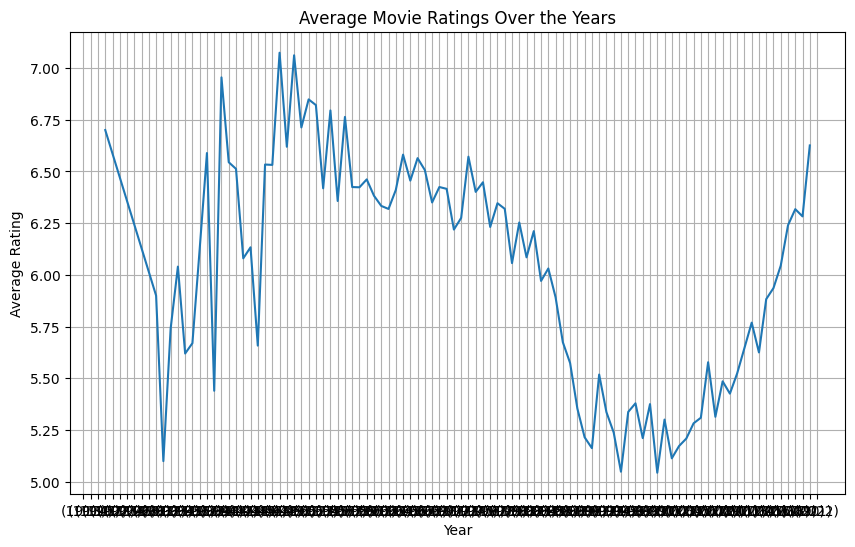

In [10]:
avg_ratings_by_year = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rating', data=avg_ratings_by_year)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Ratings Over the Years')
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [11]:
# Filter the data to show movies with ratings higher than 8
high_rated_movies = df[df['Rating'] > 8][['Name', 'Rating']]
print(high_rated_movies)

                            Name  Rating
43                          1971     8.1
75                      3 Idiots     8.4
137       A Billion Colour Story     8.1
173                  A Wednesday     8.1
392                       Aandhi     8.1
...                          ...     ...
15116          Writing with Fire     8.1
15199                     Yatrik     8.8
15288  Yeh Suhaagraat Impossible     8.6
15470           Zindagi Ek Safar     8.2
15476   Zindagi Na Milegi Dobara     8.2

[285 rows x 2 columns]


In [12]:
# Filter the data to show movies with ratings higher than 9
high_rated_movies = df[df['Rating'] > 9]
for index, row in high_rated_movies.iterrows():
    print(f"Movie: {row['Name']}, Rating: {row['Rating']}, Starring: {row['Actor 1']}")

Movie: Ashok Vatika, Rating: 9.3, Starring: Kunj Anand
Movie: Baikunth, Rating: 9.3, Starring: Vishwa Bhanu
Movie: Breed, Rating: 9.6, Starring: Bobby Kumar
Movie: Cheer Haran, Rating: 9.1, Starring: Kuldeep Ruhil
Movie: Dus, Rating: 9.1, Starring: Rahul Dev
Movie: Gho Gho Rani, Rating: 9.4, Starring: Nishi Neha Mishra
Movie: God of gods, Rating: 9.3, Starring: Tejaswini Manogna
Movie: Gully Life: The Story of Divine, Rating: 9.1, Starring: nan
Movie: Half Songs, Rating: 9.7, Starring: Raj Banerjee
Movie: I'm in Love, Rating: 9.2, Starring: Bobby Darling
Movie: June, Rating: 9.4, Starring: Vaibhav Khisti
Movie: Kaadan, Rating: 9.1, Starring: Raghu Babu
Movie: Love Qubool Hai, Rating: 10.0, Starring: Ahaan Jha
Movie: Love Sorries, Rating: 9.3, Starring: Prashant Chaubey
Movie: Mahakaleshwar - Legends of Shiva, Rating: 9.3, Starring: nan
Movie: Meher, Rating: 9.3, Starring: Amrit
Movie: Nirmal Anand Ki Puppy, Rating: 9.1, Starring: Karanveer
Movie: Nirvana13, Rating: 9.1, Starring: P.P. 